In [1]:
import pandas as pd
import warnings 
import math 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import top_k_accuracy_score
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('C:/Users/manul/Desktop/Major project/Project/DelhiNCR Restaurants.csv',encoding='latin-1')

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        1965 non-null   object 
 1   Category               1965 non-null   object 
 2   Pricing_for_2          1965 non-null   int64  
 3   Locality               1965 non-null   object 
 4   Dining_Rating          1965 non-null   float64
 5   Dining_Review_Count    1965 non-null   int64  
 6   Delivery_Rating        1563 non-null   float64
 7   Delivery_Rating_Count  1965 non-null   int64  
 8   Website                1965 non-null   object 
 9   Address                1965 non-null   object 
 10  Phone_No               1965 non-null   object 
 11  Latitude               1965 non-null   float64
 12  Longitude              1965 non-null   float64
 13  Known_For2             1560 non-null   object 
 14  Known_For22            1124 non-null   object 
dtypes: f

,Pricing_for_2,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Latitude,Longitude
count,1965.000000,1965.000000,1965.000000,1563.000000,1965.000000,1965.000000,1965.000000
mean,1090.687023,4.140000,721.954198,3.964299,3029.550636,28.549542,77.161570
std,934.481617,0.202147,932.618839,0.242305,6529.839896,0.784241,1.685399
min,100.000000,3.900000,3.000000,2.800000,0.000000,-5.975200,2.650463
25%,500.000000,4.000000,244.000000,3.800000,34.000000,28.496564,77.100745
50%,700.000000,4.100000,433.000000,4.000000,604.000000,28.567882,77.201558
75%,1500.000000,4.300000,842.000000,4.100000,3316.000000,28.635845,77.258408
max,8000.000000,4.900000,10100.000000,4.500000,87700.000000,29.065189,77.536009


In [4]:
df['id'] = df.index
df_1 = df
df.drop(['Delivery_Rating','Delivery_Rating_Count','Website','Phone_No','Longitude','Latitude','Known_For2','Known_For22'],axis=1,inplace=True)
df.dropna(inplace=True)
df.shape

(1965, 8)

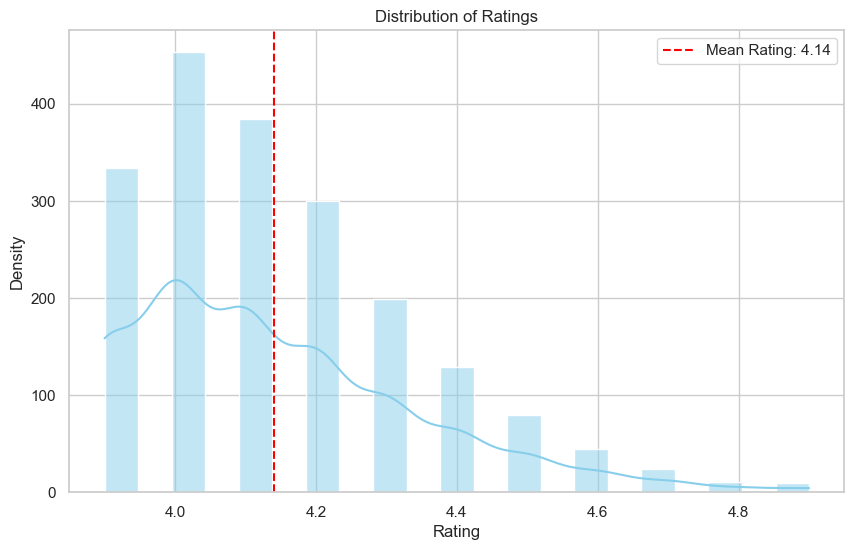

In [5]:
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot the distribution of ratings
sns.histplot(df['Dining_Rating'], kde=True, color='skyblue')

# Set title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

# Add a vertical line for the mean rating
mean_rating = df['Dining_Rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean Rating: {mean_rating:.2f}')

# Add legend
plt.legend()

# Show plot
plt.show()

In [6]:
df['Final_rating'] = df.apply(lambda x: x['Dining_Rating'] * math.log10(x['Dining_Review_Count']), axis=1)
df['Locality'].unique()

array([' ITO, New Delhi', ' Pragati Maidan, New Delhi',
       ' ITC Maurya, Chanakyapuri, New Delhi',
       ' Cyber Hub, DLF Cyber City, Gurgaon', ' Khan Market, New Delhi',
       ' Lodhi Colony, New Delhi', ' Sector 15, Gurgaon',
       ' Connaught Place, New Delhi', ' Chawri Bazar, New Delhi',
       ' Kailash Colony, New Delhi',
       ' Two Horizon Center, Golf Course Road, Gurgaon',
       ' Vijay Nagar, New Delhi', ' Chanakyapuri, New Delhi',
       ' Select Citywalk Mall, Saket, New Delhi',
       ' Hauz Khas Village, New Delhi',
       ' Ambience Mall, DLF Phase 3, Gurgaon',
       ' DLF Mall of India, Sector 18,  Noida, Noida',
       ' M Block Market, Greater Kailash 1 (GK1), New Delhi',
       ' Pandara Road Market, New Delhi', ' Mehrauli, New Delhi',
       ' Chandni Chowk, New Delhi',
       ' The Claridges, Aurangzeb Road, New Delhi',
       ' Anand Vihar, New Delhi',
       ' Delhi University-GTB Nagar, New Delhi',
       ' Geetanjali Enclave, New Delhi',
       ' Gre

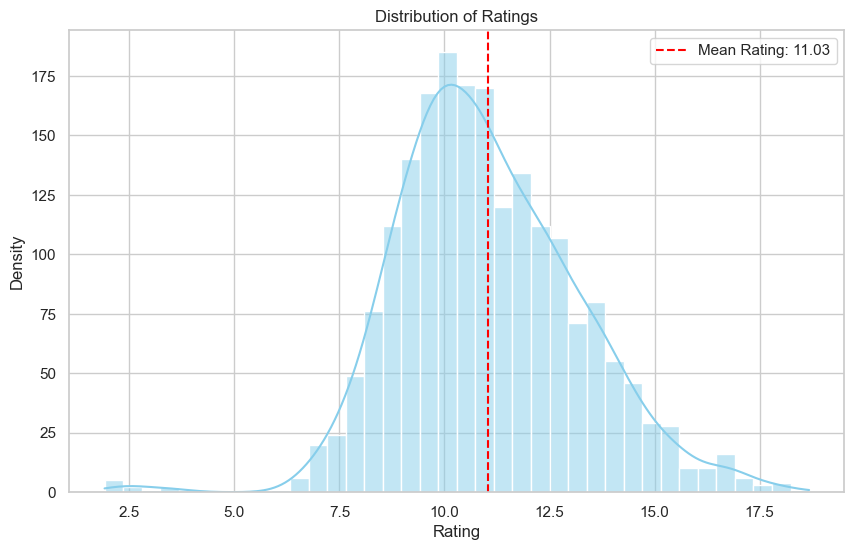

In [7]:
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot the distribution of ratings
sns.histplot(df['Final_rating'], kde=True, color='skyblue')

# Set title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

# Add a vertical line for the mean rating
mean_rating = df['Final_rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean Rating: {mean_rating:.2f}')

# Add legend
plt.legend()

# Show plot
plt.show()

In [8]:
df['City'] = df.apply(lambda x: x['Locality'].split(",") , axis=1)
df['City'] = df.apply(lambda x: x['City'][-1].strip() , axis=1)
y=list(set(df['City']))
y.sort()
print(y)

['Faridabad', 'Ghaziabad', 'Greater Noida', 'Gurgaon', 'New Delhi', 'Noida']


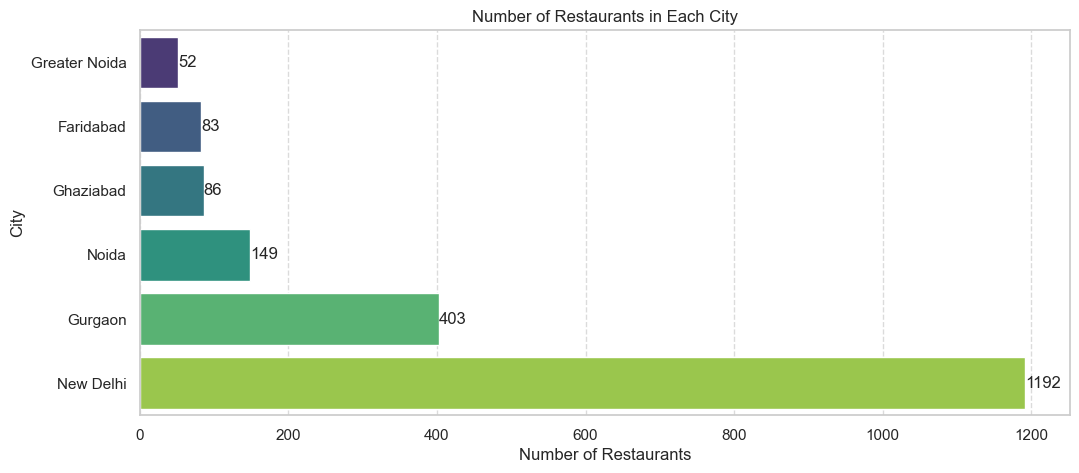

In [9]:
# Counting the number of restaurants in each city
restaurant_count = df['City'].value_counts()

# Sorting the cities by count of restaurants
restaurant_count = restaurant_count.sort_values(ascending=True)

# Plotting the data
plt.figure(figsize=(12, 5))
sns.barplot(x=restaurant_count.values, y=restaurant_count.index, palette='viridis')

# Adding annotations for each bar
for i, count in enumerate(restaurant_count.values):
    plt.text(count + 0.1, i, str(count), va='center')

plt.title('Number of Restaurants in Each City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [10]:
for (i, item) in enumerate(y, start=1):
    print(i, item, end='\t')
city=y[int(input("Enter the location number ")) -1]
city

1 Faridabad	2 Ghaziabad	3 Greater Noida	4 Gurgaon	5 New Delhi	6 Noida	Enter the location number 5


'New Delhi'

In [11]:
df.columns

Index(['Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Address', 'id', 'Final_rating',
       'City'],
      dtype='object')

In [12]:
tf=df[df.City==city].copy()
tf.columns

Index(['Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Address', 'id', 'Final_rating',
       'City'],
      dtype='object')

In [13]:
set(tf['City'])

{'New Delhi'}

In [14]:
m=tf['Final_rating'].max()
tf['Final_rating'] = tf.apply(lambda x: (x['Final_rating']*5)/m,axis=1)

In [15]:
tf['Category'] = tf.apply(lambda x: x['Category'].split(","),axis=1)
tf['Category'] = tf.apply(lambda x: list(i.strip() for i in x['Category']),axis=1)
print(tf['Category'])

x = list(tf.get('Category'))
x = list(set(itertools.chain.from_iterable(x)))

0       [Parsi, Street Food, North Indian, Desserts, B...
1           [Cafe, South Indian, North Indian, Beverages]
2                       [Mughlai, North Indian, Desserts]
4                        [Continental, American, Italian]
5                                          [South Indian]
                              ...                        
1959                 [Frozen Yogurt, Desserts, Beverages]
1960          [Mughlai, North Indian, Chinese, Fast Food]
1961                                       [South Indian]
1962                     [North Indian, Chinese, Mughlai]
1963    [Cafe, North Indian, Chinese, Kashmiri, Rolls,...
Name: Category, Length: 1192, dtype: object


In [16]:
category_counts = {}
for categories in tf['Category']:
    for category in categories:
        category_counts[category] = category_counts.get(category, 0) + 1

# Filter out categories that appear less than 10 times
min_count = 10
filtered_categories = [category for category, count in category_counts.items() if count >= min_count]

# Update the list 'x' to include only filtered categories
x = [category for category in x if category in filtered_categories]

# Print the updated list 'x'
print(x)

['Asian', 'Mughlai', 'Burger', 'Mexican', 'Mithai', 'Momos', 'Kebab', 'Ice Cream', 'Italian', 'Fast Food', 'Beverages', 'Continental', 'Mediterranean', 'Biryani', 'European', 'Chinese', 'Healthy Food', 'Pizza', 'South Indian', 'Lebanese', 'Tibetan', 'Modern Indian', 'Bakery', 'Sushi', 'Salad', 'Seafood', 'Desserts', 'North Indian', 'Finger Food', 'Wraps', 'Naga', 'Bar Food', 'Rolls', 'Cafe', 'Pasta', 'Thai', 'Street Food', 'Tea', 'Sandwich', 'Japanese', 'Coffee', 'American']


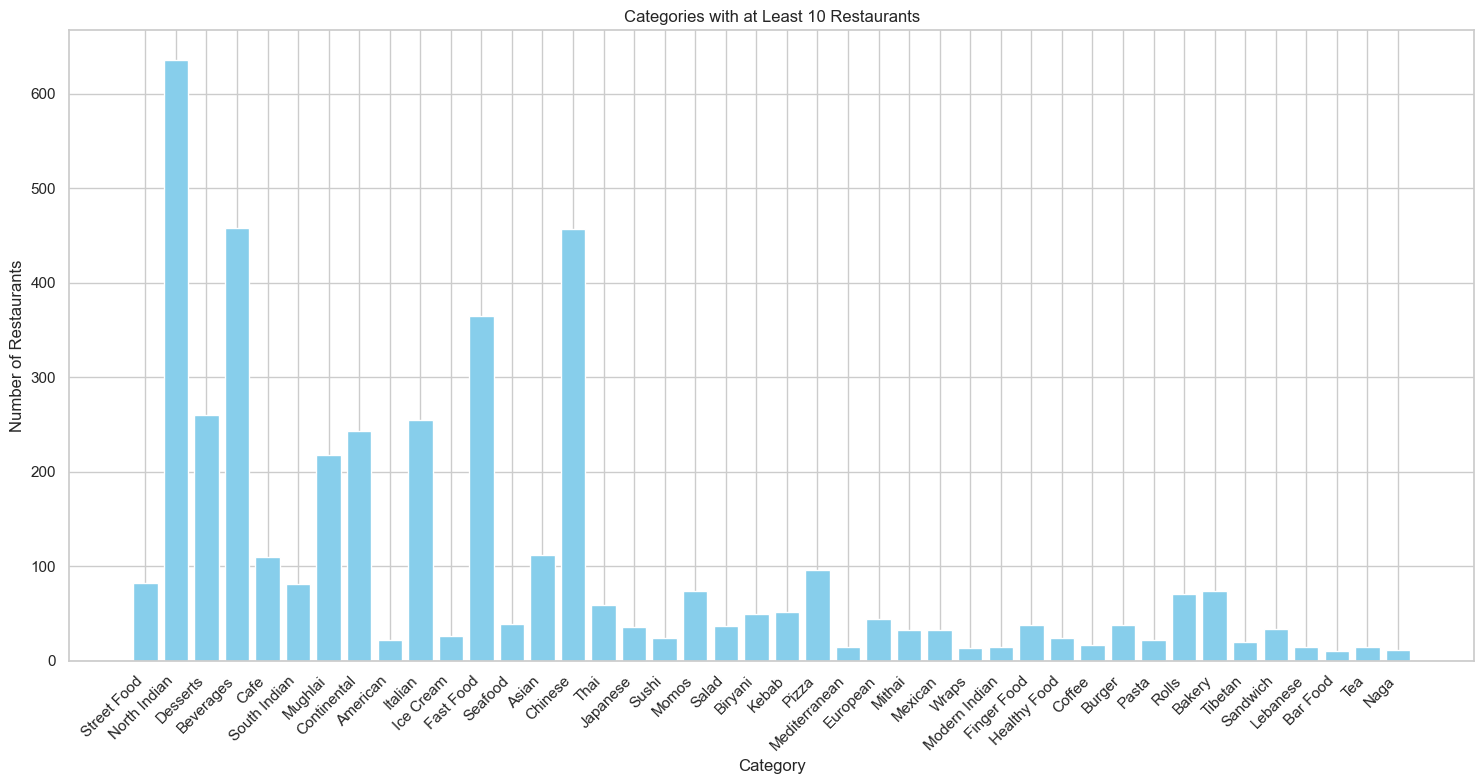

In [17]:
min_count = 10
filtered_categories = {k: v for k, v in category_counts.items() if v >= min_count}

plt.figure(figsize=(15, 8))
plt.bar(filtered_categories.keys(), filtered_categories.values(), color='skyblue')
plt.title('Categories with at Least 10 Restaurants')
plt.xlabel('Category')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
for (i, item) in enumerate(x, start=1):
    if i%5==0:
        t='\n'
    else:
        t='\t'
    print(i, item ,end=t)
categories=[]
for i in range(5):
    categories.append(x[int(input('select 5 categoies'))-1])

1 Asian	2 Mughlai	3 Burger	4 Mexican	5 Mithai
6 Momos	7 Kebab	8 Ice Cream	9 Italian	10 Fast Food
11 Beverages	12 Continental	13 Mediterranean	14 Biryani	15 European
16 Chinese	17 Healthy Food	18 Pizza	19 South Indian	20 Lebanese
21 Tibetan	22 Modern Indian	23 Bakery	24 Sushi	25 Salad
26 Seafood	27 Desserts	28 North Indian	29 Finger Food	30 Wraps
31 Naga	32 Bar Food	33 Rolls	34 Cafe	35 Pasta
36 Thai	37 Street Food	38 Tea	39 Sandwich	40 Japanese
41 Coffee	42 American	select 5 categoies28
select 5 categoies22
select 5 categoies27
select 5 categoies8
select 5 categoies10


In [19]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return len(lst3)

In [20]:
tf["CategoryMatch"] = tf.apply(lambda x: intersection(x['Category'],categories),axis=1)

In [21]:
j=tf['Pricing_for_2'].max()
tf['Pricing_index']=tf.apply(lambda x: (x['Pricing_for_2']*5)/j, axis=1)

In [22]:
x = tf[['Dining_Rating','Final_rating','Pricing_index','CategoryMatch']]
y = tf['id']

In [23]:
p = int(input("Enter price for 2 in multiple of 100\t"))
x_test = pd.DataFrame({'Dining_Rating':[5],'Final_rating':[5],'Pricing_index':[(p*5)/j],'CategoryMatch':[5]})

Enter price for 2 in multiple of 100	2000


In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

distance , y_pred = knn.kneighbors(x_test,n_neighbors=5)
distance , y_pred

(array([[2.16281527, 2.26007824, 2.32701699, 2.40288391, 2.40490557]]),
 array([[544,   7, 199, 333,  46]], dtype=int64))

In [25]:
tf.iloc[y_pred[0]]

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Address,id,Final_rating,City,CategoryMatch,Pricing_index
883,Hira Sweets,"[Mithai, North Indian, South Indian, Fast Food...",600,"Laxmi Nagar, New Delhi",4.1,1717,"E-60, Vikas Marg, Laxmi Nagar, New Delhi",883,3.550122,New Delhi,4,0.3750
9,Juggernaut,"[South Indian, North Indian, Fast Food, Desser...",700,"Kailash Colony, New Delhi",4.8,2480,"HS-16, Main Market, Kailash Colony, New Delhi",9,4.361410,New Delhi,3,0.4375
308,Uncultured Cafe And Bar,"[Continental, Chinese, Italian, Finger Food, F...",1900,"Kailash Colony, New Delhi",4.3,3237,"HS-12, Market, Kailash Colony, New Delhi",308,4.040259,New Delhi,3,1.1875
527,Raasta,"[Italian, Fast Food, Pizza, Chinese, North Ind...",2500,"Green Park, New Delhi",4.2,3483,"A-2/A, Floor 2, Aurobindo Marg, Green Park, Ne...",527,3.982063,New Delhi,3,1.5625
70,Wenger's Deli,"[Fast Food, Desserts, Beverages, North Indian,...",500,"Connaught Place, New Delhi",4.6,2290,"A 18, Radial Road, Connaught Place, New Delhi",70,4.137061,New Delhi,3,0.3125


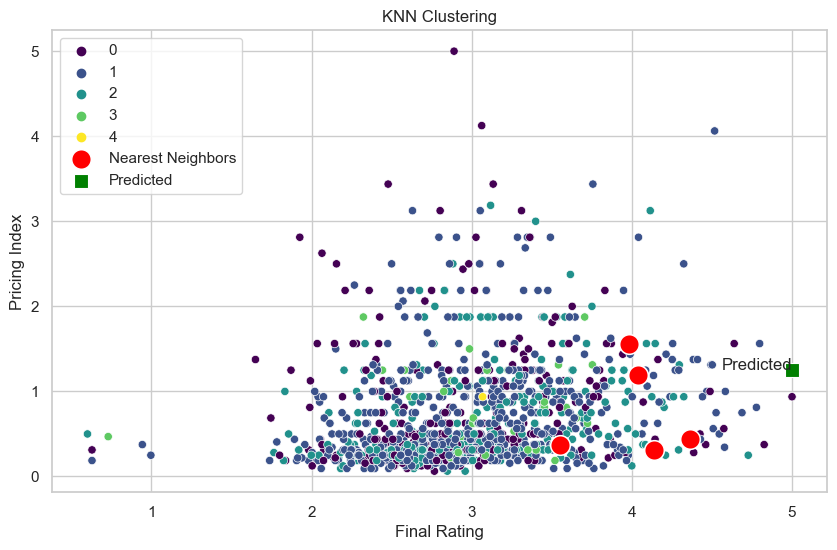

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Final_rating', y='Pricing_index', hue='CategoryMatch', data=tf, palette='viridis', legend='full')

# Highlighting nearest neighbors
nearest_neighbors = tf.iloc[y_pred[0]]
sns.scatterplot(x='Final_rating', y='Pricing_index', data=nearest_neighbors, color='red', marker='o', s=200, label='Nearest Neighbors')

# Highlighting predicted data point
sns.scatterplot(x='Final_rating', y='Pricing_index', data=x_test, color='green', marker='s', s=100, label='Predicted')

# Annotating predicted data point
plt.text(x_test['Final_rating'], x_test['Pricing_index'], 'Predicted', ha='right')

plt.title('KNN Clustering')
plt.xlabel('Final Rating')
plt.ylabel('Pricing Index')
plt.legend()
plt.show()